In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [2]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


2.1 Exploración inicial

In [8]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# TODO: Muestra la información general del dataset (tipos de datos, valores no nulos)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# TODO: Calcula y muestra las estadísticas descriptivas del dataset
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
# TODO: Verifica si hay valores nulos en el dataset
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Ejercicio 2.2: Análisis de la variable objetivo

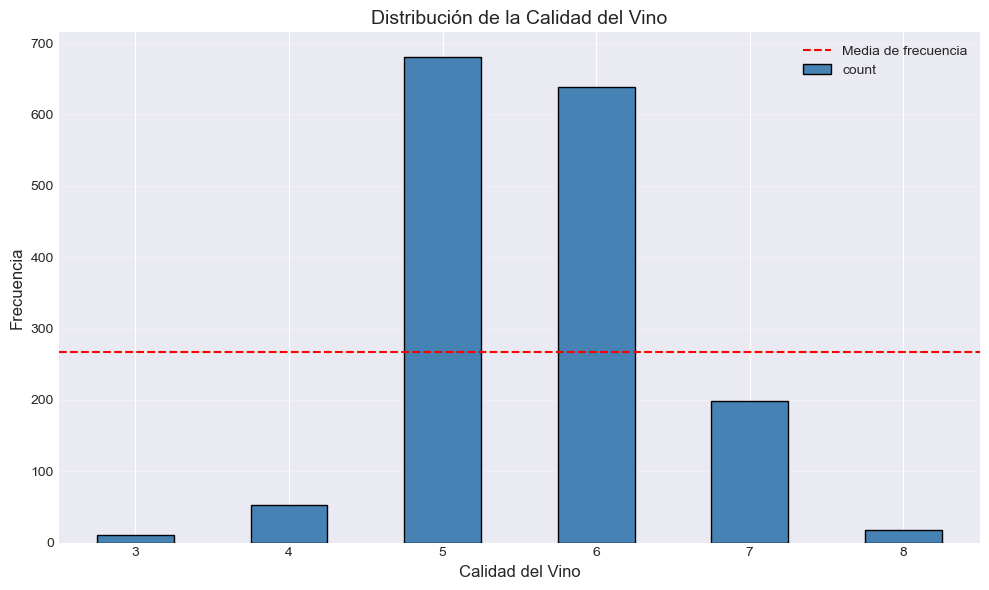

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [12]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

Ejercicio 2.3: Matriz de correlación

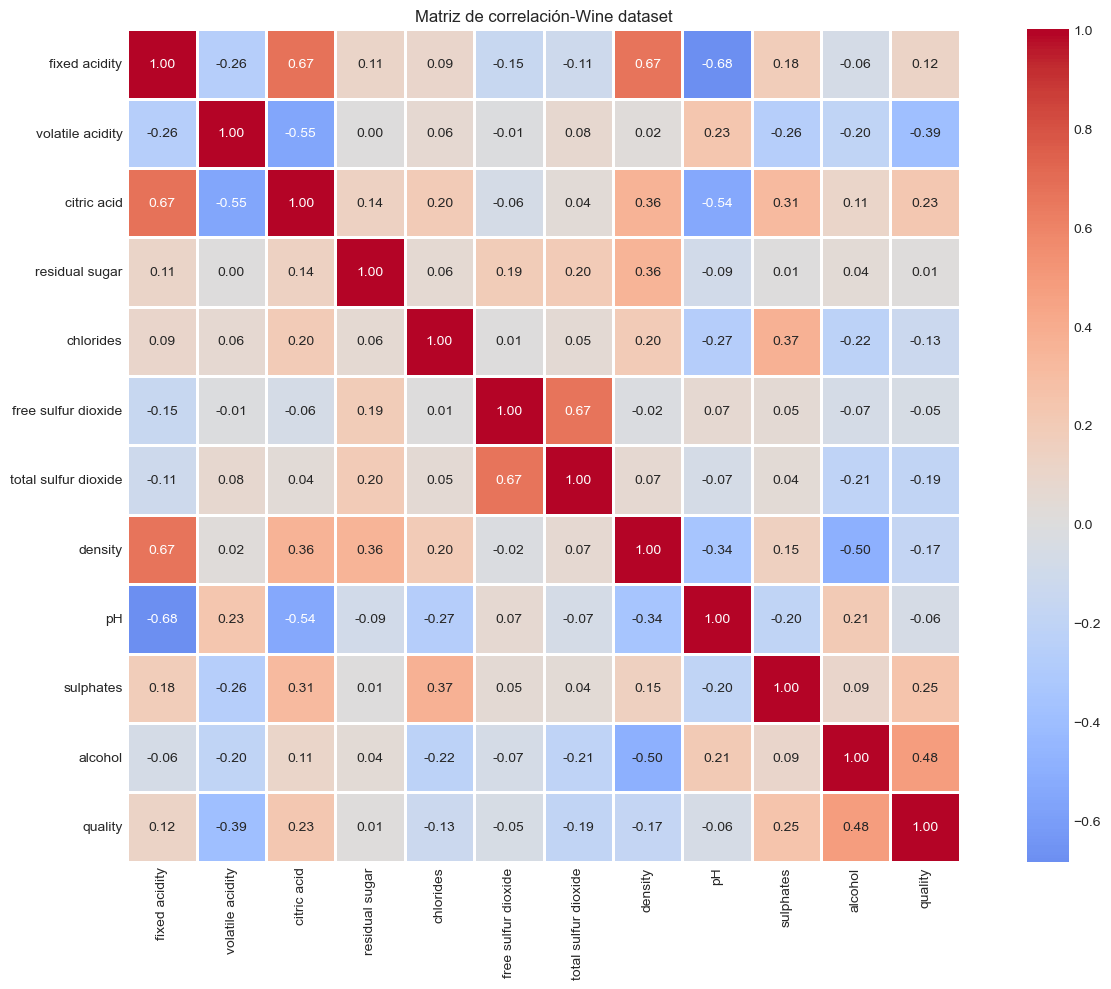

In [15]:
# TODO: Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
corr_matrix = wine_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt=".2f")
plt.title("Matriz de correlación-Wine dataset")
plt.tight_layout()
plt.show()

In [17]:
# TODO: Identifica y muestra las 5 variables más correlacionadas con 'quality'
corr_quality = corr_matrix['quality'].drop('quality')  # excluir la autocorrelación
top5_corr = corr_quality.abs().sort_values(ascending=False).head(5)

print("Top 5 variables más correlacionadas (VA):")
print(top5_corr)

Top 5 variables más correlacionadas (VA):
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64


Ejercicio 2.4: Visualización de relaciones

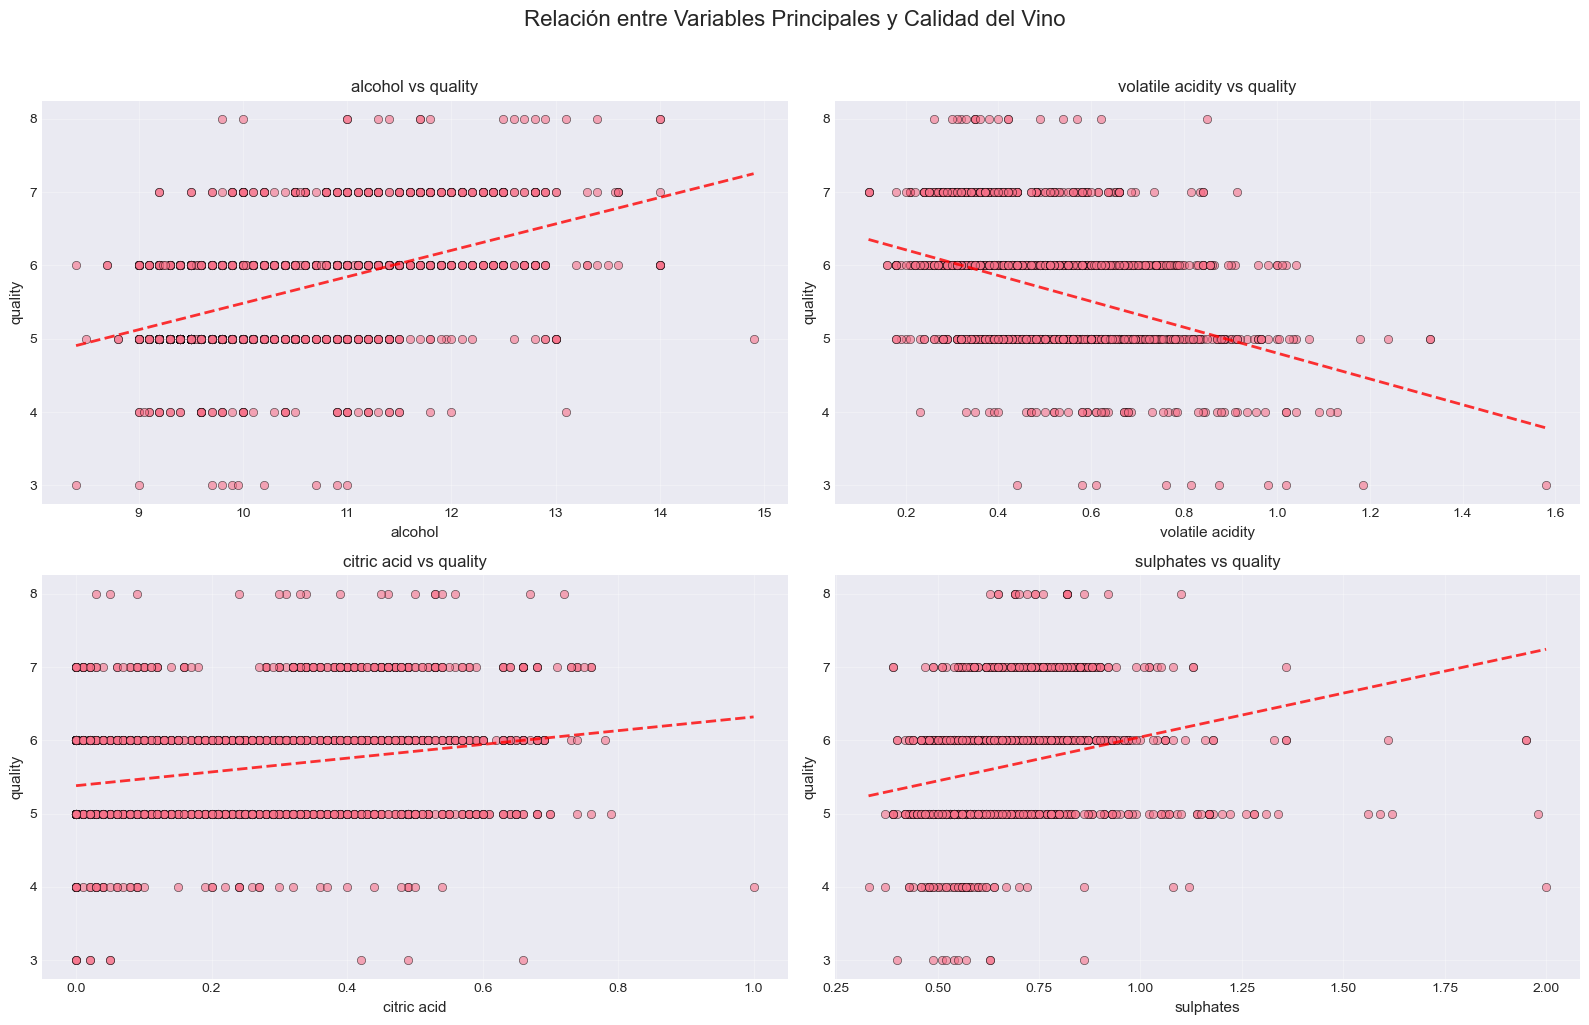

In [22]:
# Relación entre variables principales y la calidad del vino
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16, y=1.02)

for ax, predictor in zip(axes.flat, top_features):
    x = wine_data[predictor]
    y = wine_data['quality']
    
    ax.scatter(x, y, alpha=0.6, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(predictor, fontsize=11)
    ax.set_ylabel('quality', fontsize=11)
    ax.set_title(f'{predictor} vs quality', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Línea de tendencia (grado 1)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    xs = np.sort(x.values)
    ax.plot(xs, p(xs), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


3. Preparación de Datos

In [23]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [24]:
# TODO: Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("División de datos completada:")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

División de datos completada:
Tamaño del conjunto de entrenamiento: 1279 muestras (80.0%)
Tamaño del conjunto de prueba: 320 muestras (20.0%)


In [27]:
# TODO: Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos estandarizados para Ridge y Lasso:")
print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")


Datos estandarizados para Ridge y Lasso:
Media de X_train_scaled: [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.]
Desviación estándar de X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


4. Validación Cruzada para Selección de Hiperparámetros

Ejercicio 4.1: Implementación manual de validación cruzada

In [29]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# TODO: Identifica el mejor alpha basado en el RMSE medio más bajo
best_result = min(cv_results_manual, key=lambda d: d['mean_rmse'])
best_alpha = best_result['alpha']
best_rmse = best_result['mean_rmse']
best_std = best_result['std_rmse']

print("\nMejor alpha encontrado:")
print(f"alpha*: {best_alpha}  |  RMSE medio: {best_rmse:.4f}  (+/- {best_std:.4f})")

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)

Mejor alpha encontrado:
alpha*: 100  |  RMSE medio: 0.6599  (+/- 0.0139)


Ejercicio 4.2: Usar RidgeCV para validación cruzada automática

In [30]:
# TODO: Usa RidgeCV para encontrar automáticamente el mejor alpha
# Pista: RidgeCV tiene un parámetro 'alphas' y 'cv'
alphas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha encontrado por RidgeCV: {ridge_cv.alpha_}")


Mejor alpha encontrado por RidgeCV: 81.11308307896873


Ejercicio 4.3: GridSearchCV para búsqueda exhaustiva

In [32]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# TODO: Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'
grid_search_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
grid_search_ridge.fit(X_train_scaled, y_train)

best_alpha = grid_search_ridge.best_params_['alpha']
best_rmse = np.sqrt(-grid_search_ridge.best_score_)
print(f"Mejor alpha: {best_alpha}")
print(f"Mejor score (RMSE): {best_rmse:.4f}")

Mejor alpha: 54.555947811685144
Mejor score (RMSE): 0.6624


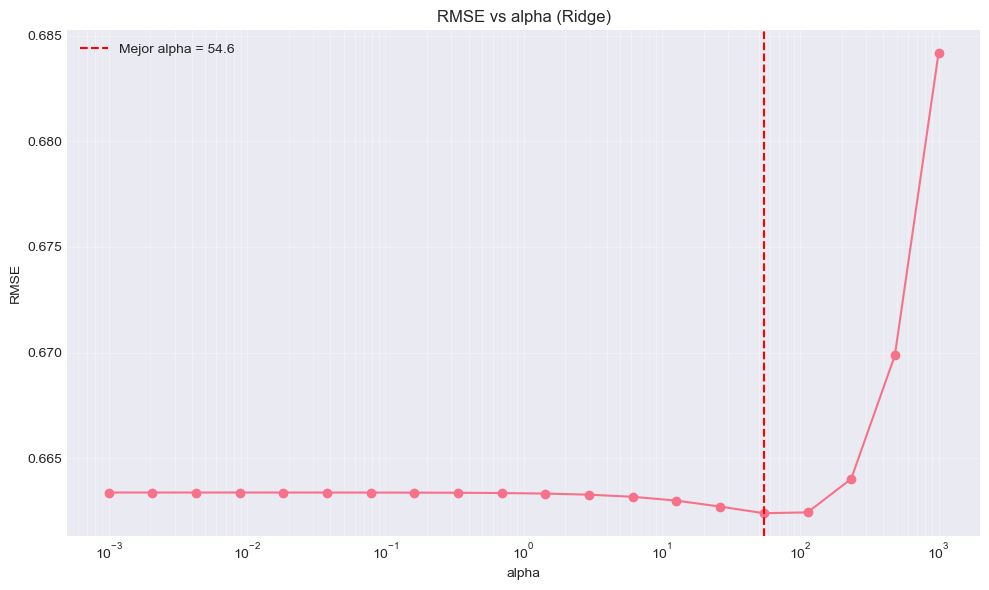

In [35]:
# TODO: Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha
cv_res = grid_search_ridge.cv_results_
alphas_gs = cv_res['param_alpha'].data if hasattr(cv_res['param_alpha'], 'data') else cv_res['param_alpha']
rmse_means = np.sqrt(-cv_res['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.semilogx(alphas_gs, rmse_means, marker='o')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Mejor alpha = {best_alpha:.3g}')
plt.title('RMSE vs alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.grid(True, which='both', axis='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

5. Modelos de Regresión

5.1 Regresión Lineal Normal

In [36]:
# TODO: Implementa y entrena un modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test  = lr_model.predict(X_test_scaled)

# Calcular métricas
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test  = np.sqrt(mean_squared_error(y_test,  y_pred_lr_test))
r2_lr_train   = r2_score(y_train, y_pred_lr_train)
r2_lr_test    = r2_score(y_test,  y_pred_lr_test)

print("Regresión Lineal Normal:")
print(f"RMSE Train: {rmse_lr_train:.4f}")
print(f"RMSE Test:  {rmse_lr_test:.4f}")
print(f"R² Train:   {r2_lr_train:.4f}")
print(f"R² Test:    {r2_lr_test:.4f}")


Regresión Lineal Normal:
RMSE Train: 0.6513
RMSE Test:  0.6245
R² Train:   0.3480
R² Test:    0.4032


5.2 Ridge Regression con mejor alpha de CV

In [39]:
# TODO: Entrena Ridge con el mejor alpha encontrado por validación cruzada
best_alpha_ridge = ridge_cv.alpha_  # Usa el mejor alpha de la parte 4.2

ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge_train = ridge_model.predict(X_train_scaled)
y_pred_ridge_test  = ridge_model.predict(X_test_scaled)

# Métricas
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test  = np.sqrt(mean_squared_error(y_test,  y_pred_ridge_test))
r2_ridge_train   = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test    = r2_score(y_test,  y_pred_ridge_test)

print("Ridge Regression con mejor alpha:")
print(f"alpha usado:       {best_alpha_ridge:.6f}")
print(f"RMSE Train:   {rmse_ridge_train:.4f}")
print(f"RMSE Test:    {rmse_ridge_test:.4f}")
print(f"R² Train:     {r2_ridge_train:.4f}")
print(f"R² Test:      {r2_ridge_test:.4f}")


Ridge Regression con mejor alpha:
alpha usado:       81.113083
RMSE Train:   0.6519
RMSE Test:    0.6262
R² Train:     0.3469
R² Test:      0.4001


5.3 Lasso Regression con validación cruzada

In [40]:
# TODO: Implementa LassoCV para encontrar el mejor alpha automáticamente
alphas_lasso = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, n_jobs=-1, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha para Lasso: {lasso_cv.alpha_:.6f}")
print(f"Número de características seleccionadas: {(lasso_cv.coef_ != 0).sum()}")

# Predicciones y métricas
y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test  = lasso_cv.predict(X_test_scaled)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test  = np.sqrt(mean_squared_error(y_test,  y_pred_lasso_test))
r2_lasso_train   = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test    = r2_score(y_test,  y_pred_lasso_test)

print("Regresión Lasso:")
print(f"RMSE Train: {rmse_lasso_train:.4f}")
print(f"RMSE Test:  {rmse_lasso_test:.4f}")
print(f"R² Train:   {r2_lasso_train:.4f}")
print(f"R² Test:    {r2_lasso_test:.4f}")


Mejor alpha para Lasso: 0.008498
Número de características seleccionadas: 8
Regresión Lasso:
RMSE Train: 0.6522
RMSE Test:  0.6266
R² Train:   0.3462
R² Test:    0.3991


In [41]:
# TODO: Identifica qué características fueron eliminadas por Lasso
coef_series = pd.Series(lasso_cv.coef_, index=X.columns, name='coef')
eliminated_features = coef_series[coef_series == 0.0].index.tolist()

print("Características eliminadas por Lasso:")
print(eliminated_features)

Características eliminadas por Lasso:
['citric acid', 'residual sugar', 'density']


6. Comparación de Modelos

In [42]:
# TODO: Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test

# Calcular MAE de prueba para cada modelo
mae_lr_test    = mean_absolute_error(y_test, y_pred_lr_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

comparison_data = {
    'Modelo':      ['Linear Regression', 'Ridge (CV alpha)', 'Lasso (CV)'],
    'RMSE Train':  [rmse_lr_train,        rmse_ridge_train,    rmse_lasso_train],
    'RMSE Test':   [rmse_lr_test,         rmse_ridge_test,     rmse_lasso_test],
    'R² Train':    [r2_lr_train,          r2_ridge_train,      r2_lasso_train],
    'R² Test':     [r2_lr_test,           r2_ridge_test,       r2_lasso_test],
    'MAE Test':    [mae_lr_test,          mae_ridge_test,      mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


              Modelo  RMSE Train  RMSE Test  R² Train   R² Test  MAE Test
0  Linear Regression    0.651300   0.624520  0.347993  0.403180  0.503530
1   Ridge (CV alpha)    0.651868   0.626152  0.346853  0.400058  0.506280
2         Lasso (CV)    0.652170   0.626642  0.346250  0.399117  0.507139


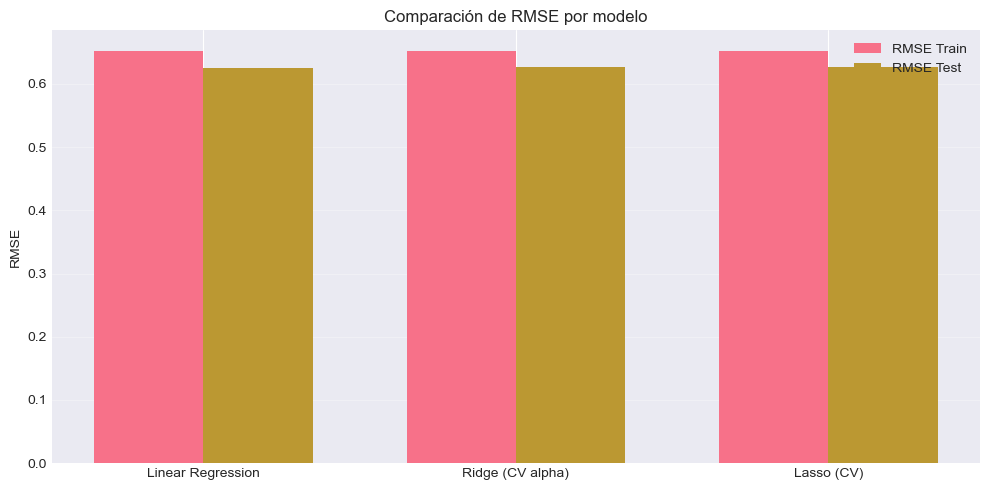

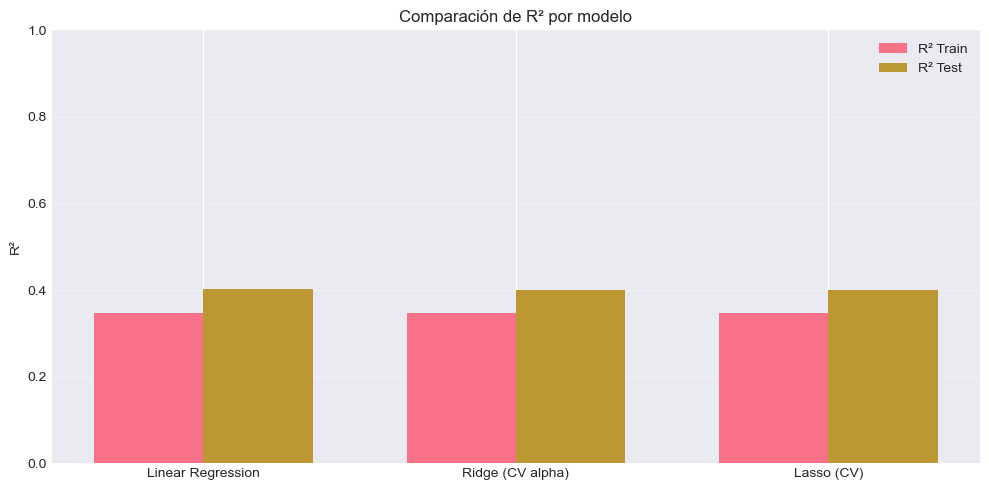

In [ ]:
# TODO: Crea visualizaciones para comparar los modelos
# 1) Gráfico de barras comparando RMSE
plt.figure(figsize=(10, 5))
x = np.arange(len(comparison_df['Modelo']))
width = 0.35

plt.bar(x - width/2, comparison_df['RMSE Train'], width, label='RMSE Train')
plt.bar(x + width/2, comparison_df['RMSE Test'],  width, label='RMSE Test')

plt.xticks(x, comparison_df['Modelo'])
plt.ylabel('RMSE')
plt.title('Comparación de RMSE por modelo')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 2) Gráfico de barras comparando R² 
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, comparison_df['R² Train'], width, label='R² Train')
plt.bar(x + width/2, comparison_df['R² Test'],  width, label='R² Test')

plt.xticks(x, comparison_df['Modelo'])
plt.ylabel('R²')
plt.title('Comparación de R² por modelo')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)  # opcional: acotar a [0,1]

plt.tight_layout()
plt.show()


7. Análisis de Residuos

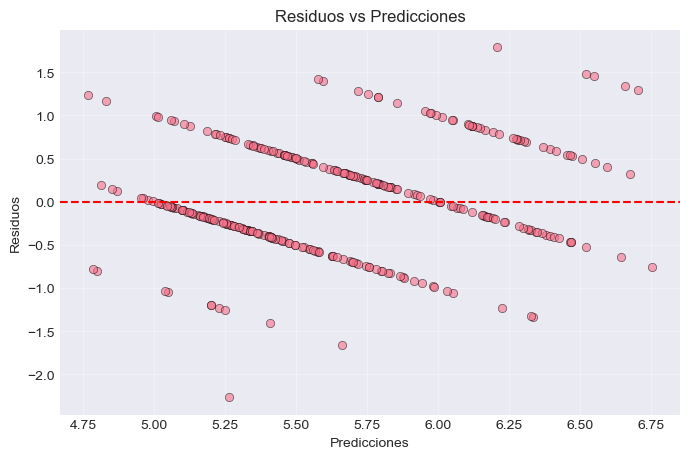

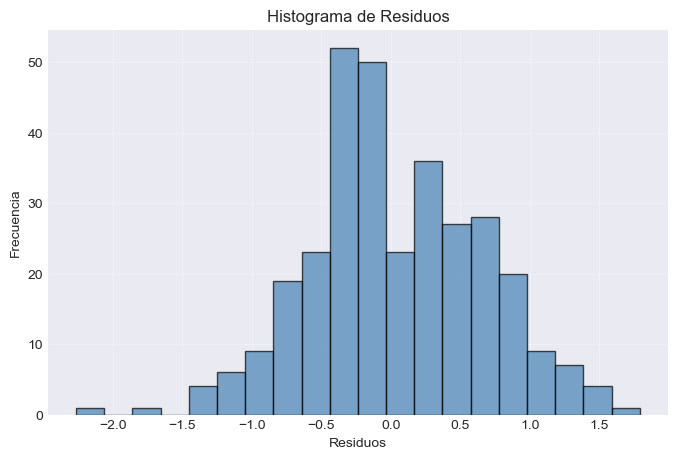

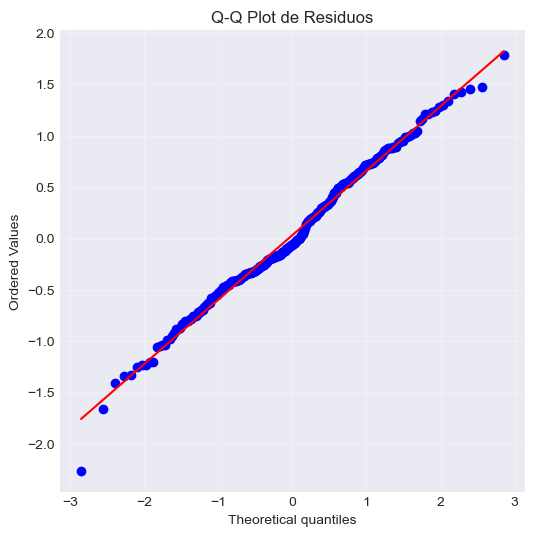

In [46]:
# TODO: Para el mejor modelo, crea:

# Calcular residuos
y_pred_best = y_pred_ridge_test  
residuals = y_test - y_pred_best

# 1. Gráfico de residuos vs predicciones
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_best, residuals, alpha=0.6, edgecolor='black', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.grid(alpha=0.3)
plt.show()

# 2. Histograma de residuos
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.grid(alpha=0.3)
plt.show()

# 3. Q-Q plot de residuos
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot de Residuos")
plt.grid(alpha=0.3)
plt.show()

8. Importancia de Características

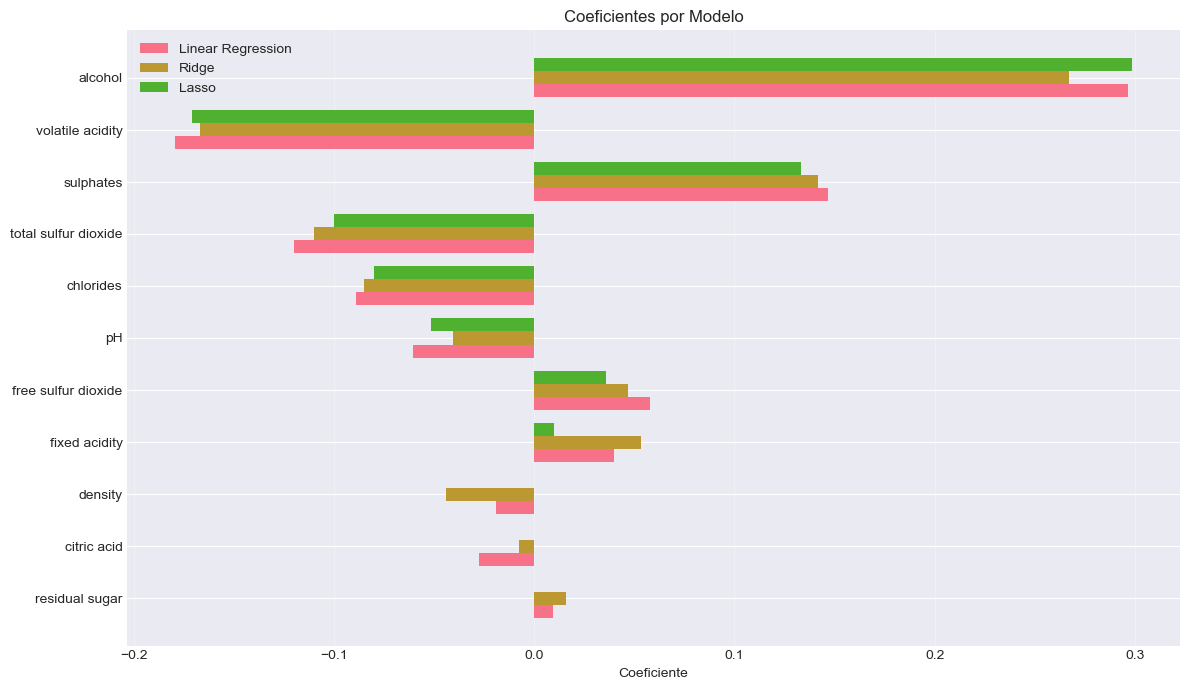

In [48]:
# TODO: Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes

# coeficientes
coef_df = pd.DataFrame({
    'feature': X.columns,
    'Linear': lr_model.coef_,
    'Ridge':  ridge_model.coef_,
    'Lasso':  lasso_cv.coef_
})

# Ordenar por mayor magnitud
coef_df['max_abs'] = coef_df[['Linear', 'Ridge', 'Lasso']].abs().max(axis=1)
coef_df = coef_df.sort_values('max_abs', ascending=True).drop(columns='max_abs')

# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 7))
y = np.arange(len(coef_df))
width = 0.25

ax.barh(y - width, coef_df['Linear'], height=width, label='Linear Regression')
ax.barh(y,          coef_df['Ridge'],  height=width, label='Ridge')
ax.barh(y + width,  coef_df['Lasso'],  height=width, label='Lasso')

ax.set_yticks(y)
ax.set_yticklabels(coef_df['feature'])
ax.set_xlabel('Coeficiente')
ax.set_title('Coeficientes por Modelo')
ax.grid(axis='x', alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

9. Validación Cruzada Final del Mejor Modelo

In [54]:
# TODO: Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
rmse_scores = []

X_cv = np.asarray(X_train)
y_cv = np.ravel(np.asarray(y_train))


for train_idx, val_idx in kf.split(X_cv):
    X_tr, X_va = X_cv[train_idx], X_cv[val_idx]
    y_tr, y_va = y_cv[train_idx], y_cv[val_idx]

    scaler_cv = StandardScaler()
    X_tr_s = scaler_cv.fit_transform(X_tr)
    X_va_s = scaler_cv.transform(X_va)

    model_cv = Ridge(alpha=best_alpha_ridge)
    model_cv.fit(X_tr_s, y_tr)
    y_va_pred = model_cv.predict(X_va_s)

    rmse_scores.append(np.sqrt(mean_squared_error(y_va, y_va_pred)))

print("Validación Cruzada (10 folds) - Mejor Modelo (Ridge) en TRAIN:")
print(f"RMSE medio: {np.mean(rmse_scores):.4f}")
print(f"RMSE desviación estándar: {np.std(rmse_scores):.4f}")


Validación Cruzada (10 folds) - Mejor Modelo (Ridge) en TRAIN:
RMSE medio: 0.6588
RMSE desviación estándar: 0.0324


10. Conclusiones y Preguntas de Reflexión

Preguntas para responder:

1. ¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?
Tu respuesta: El modelo que tuvo mejor desempeño fue el modelo de Ridge, pues fue el que estuvo mejor en la parte de train-test. Aunque no estoy 100% seguro, creo que Ridge fue mejor porque evita que los coeficientes de las variables sean muy grandes y por eso no se sobreajusta.
¿Qué características son las más importantes para predecir la calidad del vino?
Tu respuesta: alcohol, volatile acidity, sulphates, y citric acid
¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?
Tu respuesta: Sí, en la regresión lineal normal creo que hubo un poco de sobreajuste, me di cuenta porque la diferencia en R² entre train y test era algo importante. Sin embargo, creo que casi no noté sobreajuste en Lasso ni en Ridge.
¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?
Tu respuesta: Sí, en el caso de Ridge cuando aumentaba el valor de alpha el modelo se volvía un poco más "estable", y para el caso de Lasso cuando aumentaba la alpha más características se eliminaban lo cual no es tan bueno porque el modelo se vuelve demasiado simple que a veces malo para predecir.
¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?
Tu respuesta: Que al usar la validación cruzada pude probar el modelo varias veces y con varias divisiones, no solo con una, reduciendo las probabilidades de usar una alpha equivocada, pues gracias a este método elegí una alpha que funciona mejor en la mayoría de los casos y no una que funciona muy bien para un caso específico pero mal para los demás casos. 
Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?
Tu respuesta: Yo creo que tanto mejoró el modelo como también lo empeoró. Aunque al quitar ciertas características el modelo se volvió más simple y fácil de entender, sin embargo, la precisión no mejoró mucho, además de que eliminó características que, aunque no lo parezcan, pueden ser claves para ciertos contextos.
¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?
Tu respuesta: Implementar interacciones entre las características, agregar nuevas características que impacten el modelo, usar más datos, etc.